In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x : '{:.2f}'.format(x))
np.set_printoptions(suppress = True)

In [2]:
df_customers = pd.read_csv(r"C:\Users\ASUS\Downloads\Project2_DataCollection_Resources\customers.csv")
df_loans = pd.read_csv(r"C:\Users\ASUS\Downloads\Project2_DataCollection_Resources\loans.csv")
df_bureau = pd.read_csv(r"C:\Users\ASUS\Downloads\Project2_DataCollection_Resources\bureau_data.csv")

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [5]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [6]:
df = pd.merge(df_customers, df_loans, on = 'cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [7]:
df = pd.merge(df,df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [9]:
#default - target variable and a boolean

In [10]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
#class imbalance

In [12]:
#Train test split

In [13]:
X = df.drop ("default", axis = "columns")
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size = 0.25, random_state = 42)

df_train = pd.concat([X_train,y_train],axis = 'columns')
df_test = pd.concat([X_test,y_test],axis = 'columns')

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


<h3 align = "center" style = "color:blue"> Data Cleaning </h3>

In [15]:
# to avoid data leakage, will only use df_train

In [16]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [17]:
df.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [18]:
#CATEGORICAL VARIABLE

In [19]:
df_train.residence_type.mode()

0    Owned
Name: residence_type, dtype: object

In [20]:
mode_residence = df_train.residence_type.mode()[0]

In [21]:
df_train.residence_type.fillna(mode_residence, inplace = True)
df_train.residence_type.unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34784\492394830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace = True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [22]:
df_test.residence_type.fillna(mode_residence, inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34784\311551935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace = True)


In [23]:
df_train.duplicated().sum()

0

In [24]:
#outliers

In [25]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [26]:
df_train.select_dtypes(include = np.number)

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,59,11327000,3,30,500001,33121000,23442000,468840.00,4219560,18753600,...,5000000,4820526,4,2,152,20,118,4,36,0
32495,44,715000,0,27,400001,1175000,1149000,22980.00,206820,919200,...,467229,216697,3,1,160,10,62,5,5,0
43675,38,3195000,0,26,600001,11409000,11296000,225920.00,2033280,9036800,...,1656773,1383842,1,1,54,12,67,4,0,0
9040,42,1500000,2,30,560001,2336000,1695000,33900.00,305100,1356000,...,1023442,626203,3,0,76,0,0,8,87,0
13077,58,1817000,4,29,411001,1167000,905000,18100.00,162900,724000,...,651599,585099,1,2,60,0,0,1,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,70,2470000,0,20,700001,1562000,1420000,28400.00,255600,1136000,...,1022399,501594,2,0,40,0,0,5,13,0
5558,39,2472000,0,26,700001,3208000,2753000,55060.00,495540,2202400,...,1123466,587429,1,0,52,14,72,4,44,0
45236,39,1329000,4,10,411001,4804000,4479000,89580.00,806220,3583200,...,913243,517025,4,2,130,11,44,6,97,1
49228,33,1274000,2,26,600001,2451000,1890000,37800.00,340200,1512000,...,635515,475147,2,1,88,0,0,6,25,0


In [27]:
# default and zipcode are categorical but showing up in numeric

In [28]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

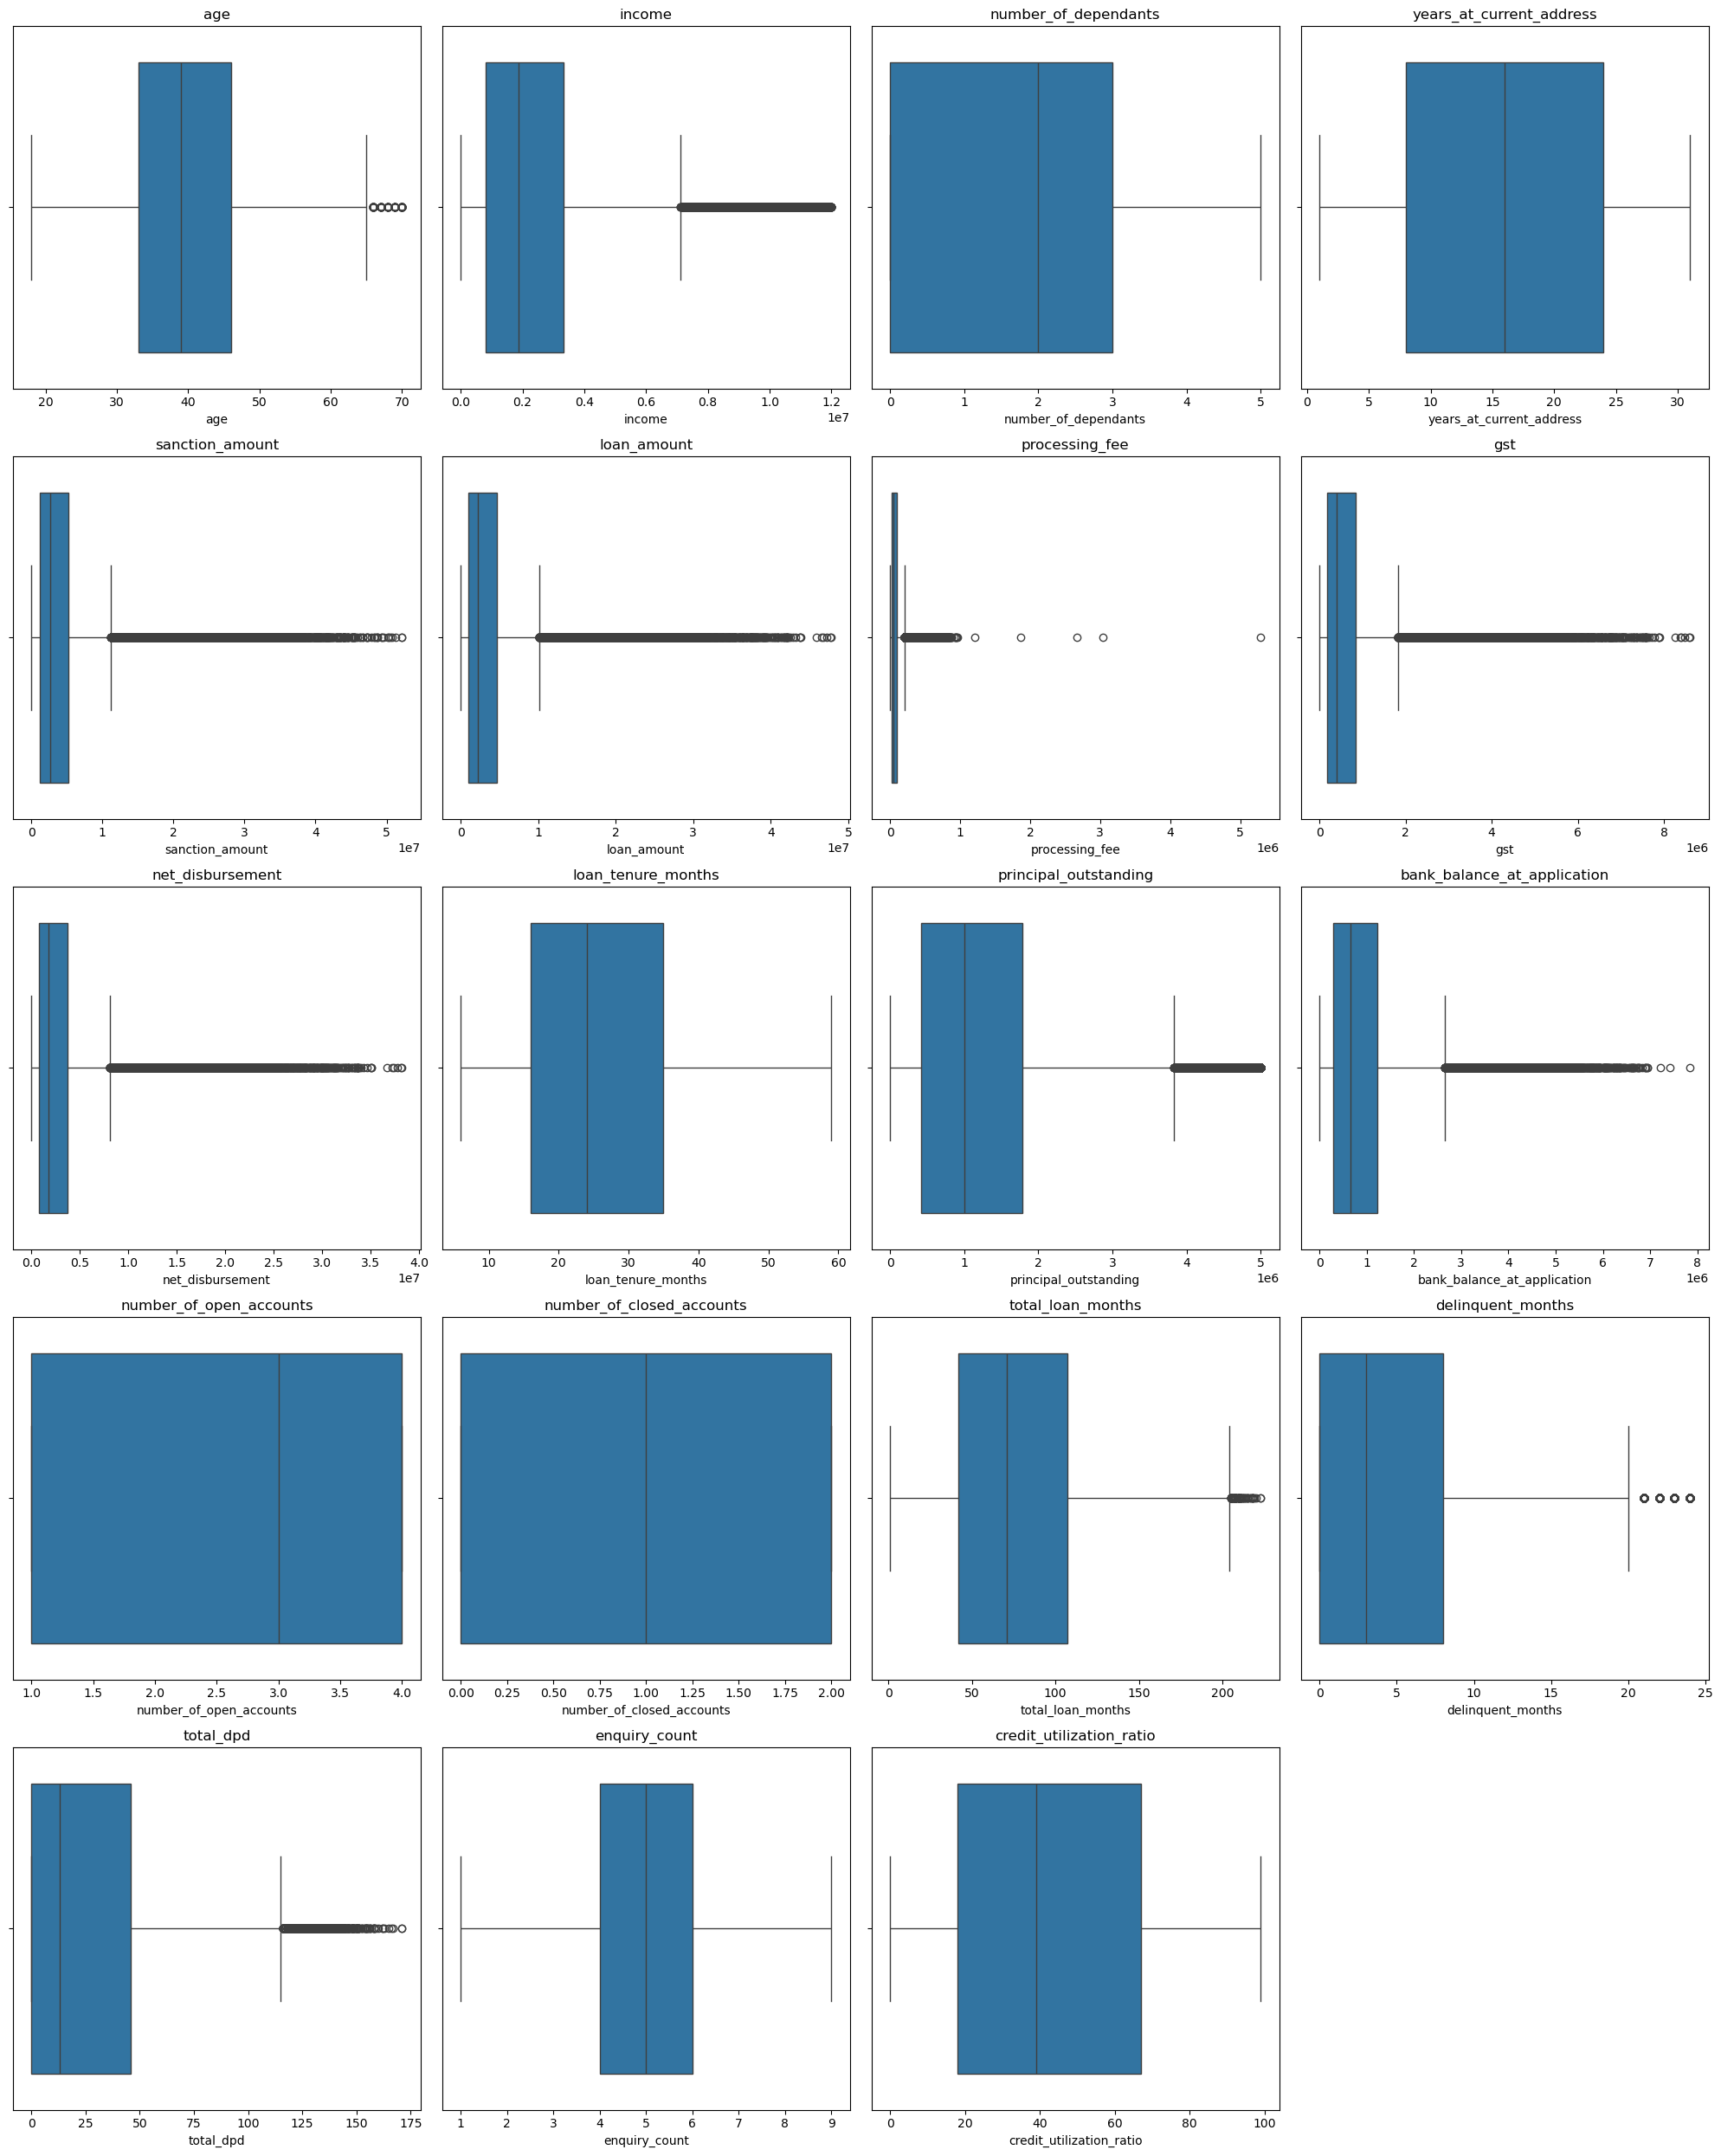

In [29]:
num_plots = len(columns_continuous)
num_cols = 4 # number of plots per row
num_rows = (num_plots  + num_cols - 1) // num_cols #calc number of rows needed

fig,axes = plt.subplots(num_rows,num_cols,figsize = (5*num_cols, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate (columns_continuous):
    sns.boxplot(x = df_train[col], ax = axes[i])
    axes[i].set_title(col) # set the title to the name of the variable

#if there are any empty plots
for j in range(i+1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

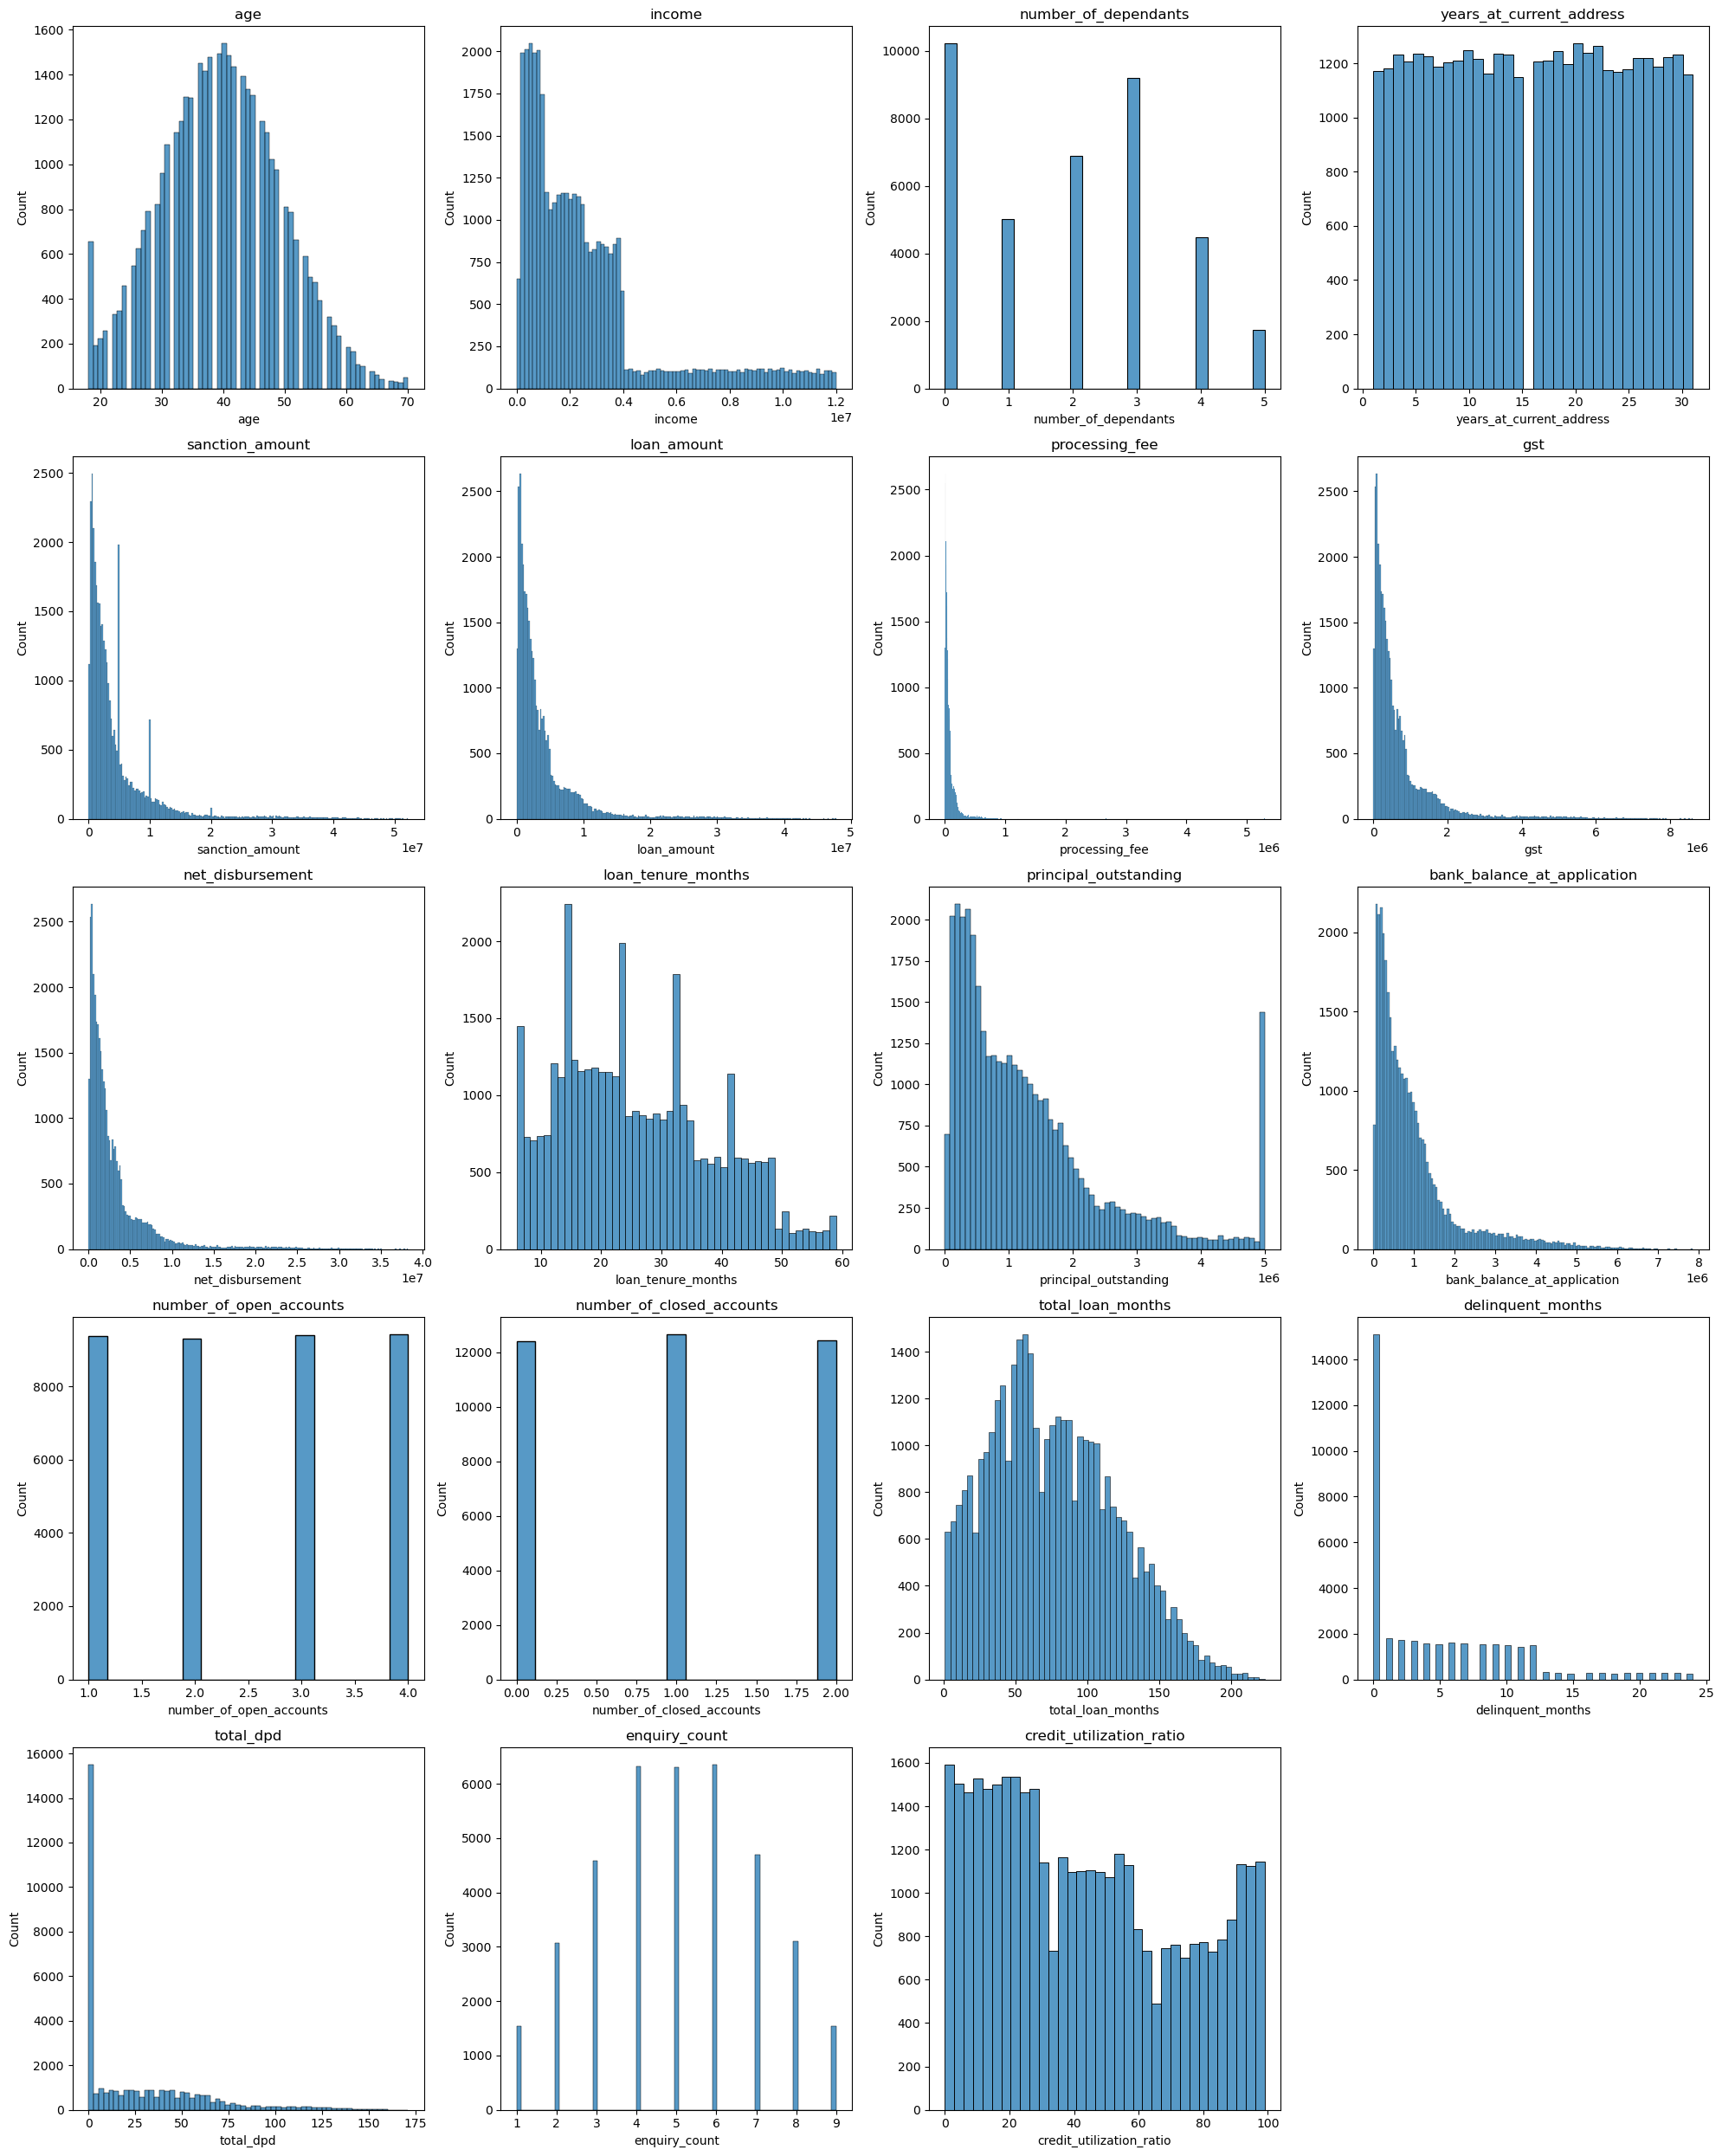

In [30]:
num_plots = len(columns_continuous)
num_cols = 4 # number of plots per row
num_rows = (num_plots  + num_cols - 1) // num_cols #calc number of rows needed

fig,axes = plt.subplots(num_rows,num_cols,figsize = (5*num_cols, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate (columns_continuous):
    sns.histplot(x = df_train[col], ax = axes[i])
    axes[i].set_title(col) # set the title to the name of the variable

#if there are any empty plots
for j in range(i+1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [31]:
#highly skewed could potentially have some problem : income right skewed seems right

In [32]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [33]:
df_train[df_train.processing_fee == df_train.processing_fee.max()]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0


In [34]:
df_train[df_train.processing_fee == df_train.processing_fee.max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
9898,3626000,5293543.52


In [35]:
# for a loan amount of 36 lac im paying 52 lacs # does not seem correct, processing fee should be less than loan amount

In [36]:
df_train[df_train.processing_fee > df_train.loan_amount][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [37]:
# business use case - processing fee should not be greater than 3 % of the loan amount

In [38]:
df_train[(df_train.processing_fee / df_train.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [39]:
df_train_1 = df_train[(df_train.processing_fee / df_train.loan_amount) < 0.03].copy()
df_train_1[(df_train_1.processing_fee / df_train_1.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee


In [40]:
# applying same transformation on test data set
df_test = df_test[(df_test.processing_fee / df_test.loan_amount) < 0.03].copy()
df_test.shape

(12497, 33)

In [41]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [42]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [43]:
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace('Personaal','Personal')
df_test["loan_purpose"] = df_test["loan_purpose"].replace('Personaal','Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [44]:
df_train[(df_train.gst/df_train.loan_amount)> 0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


<h3 align = "center" style = "color:blue"> Exploratory Data Analysis </h3>

<Axes: xlabel='age', ylabel='Density'>

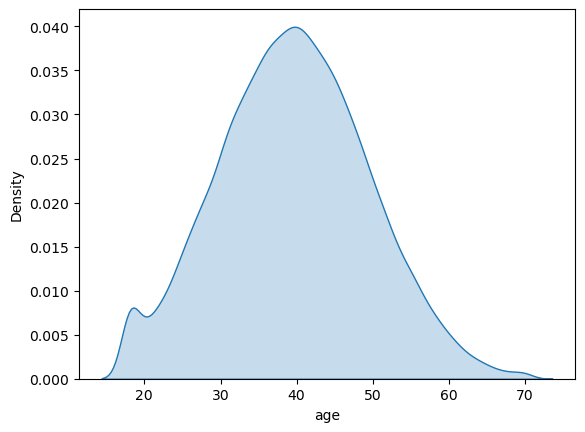

In [46]:
sns.kdeplot(df_train.age, fill = True)

### Bivariate analysis

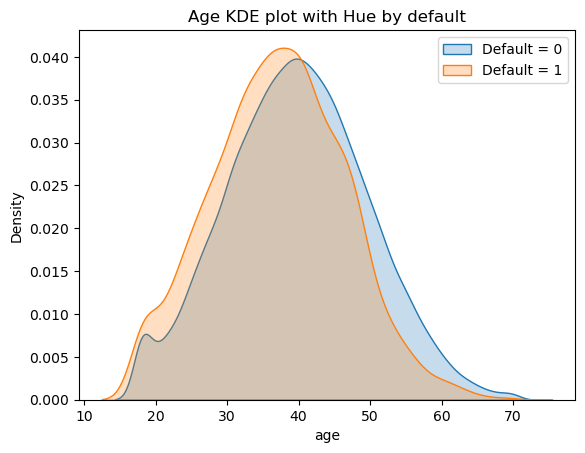

In [48]:
sns.kdeplot(df_train[df_train.default == 0]['age'], fill = True,label = 'Default = 0')
sns.kdeplot(df_train[df_train.default == 1]['age'], fill = True,label = 'Default = 1')
plt.title(f'Age KDE plot with Hue by default')
plt.legend()
plt.show()

Insights 
1. Younger aged people are more likely to default

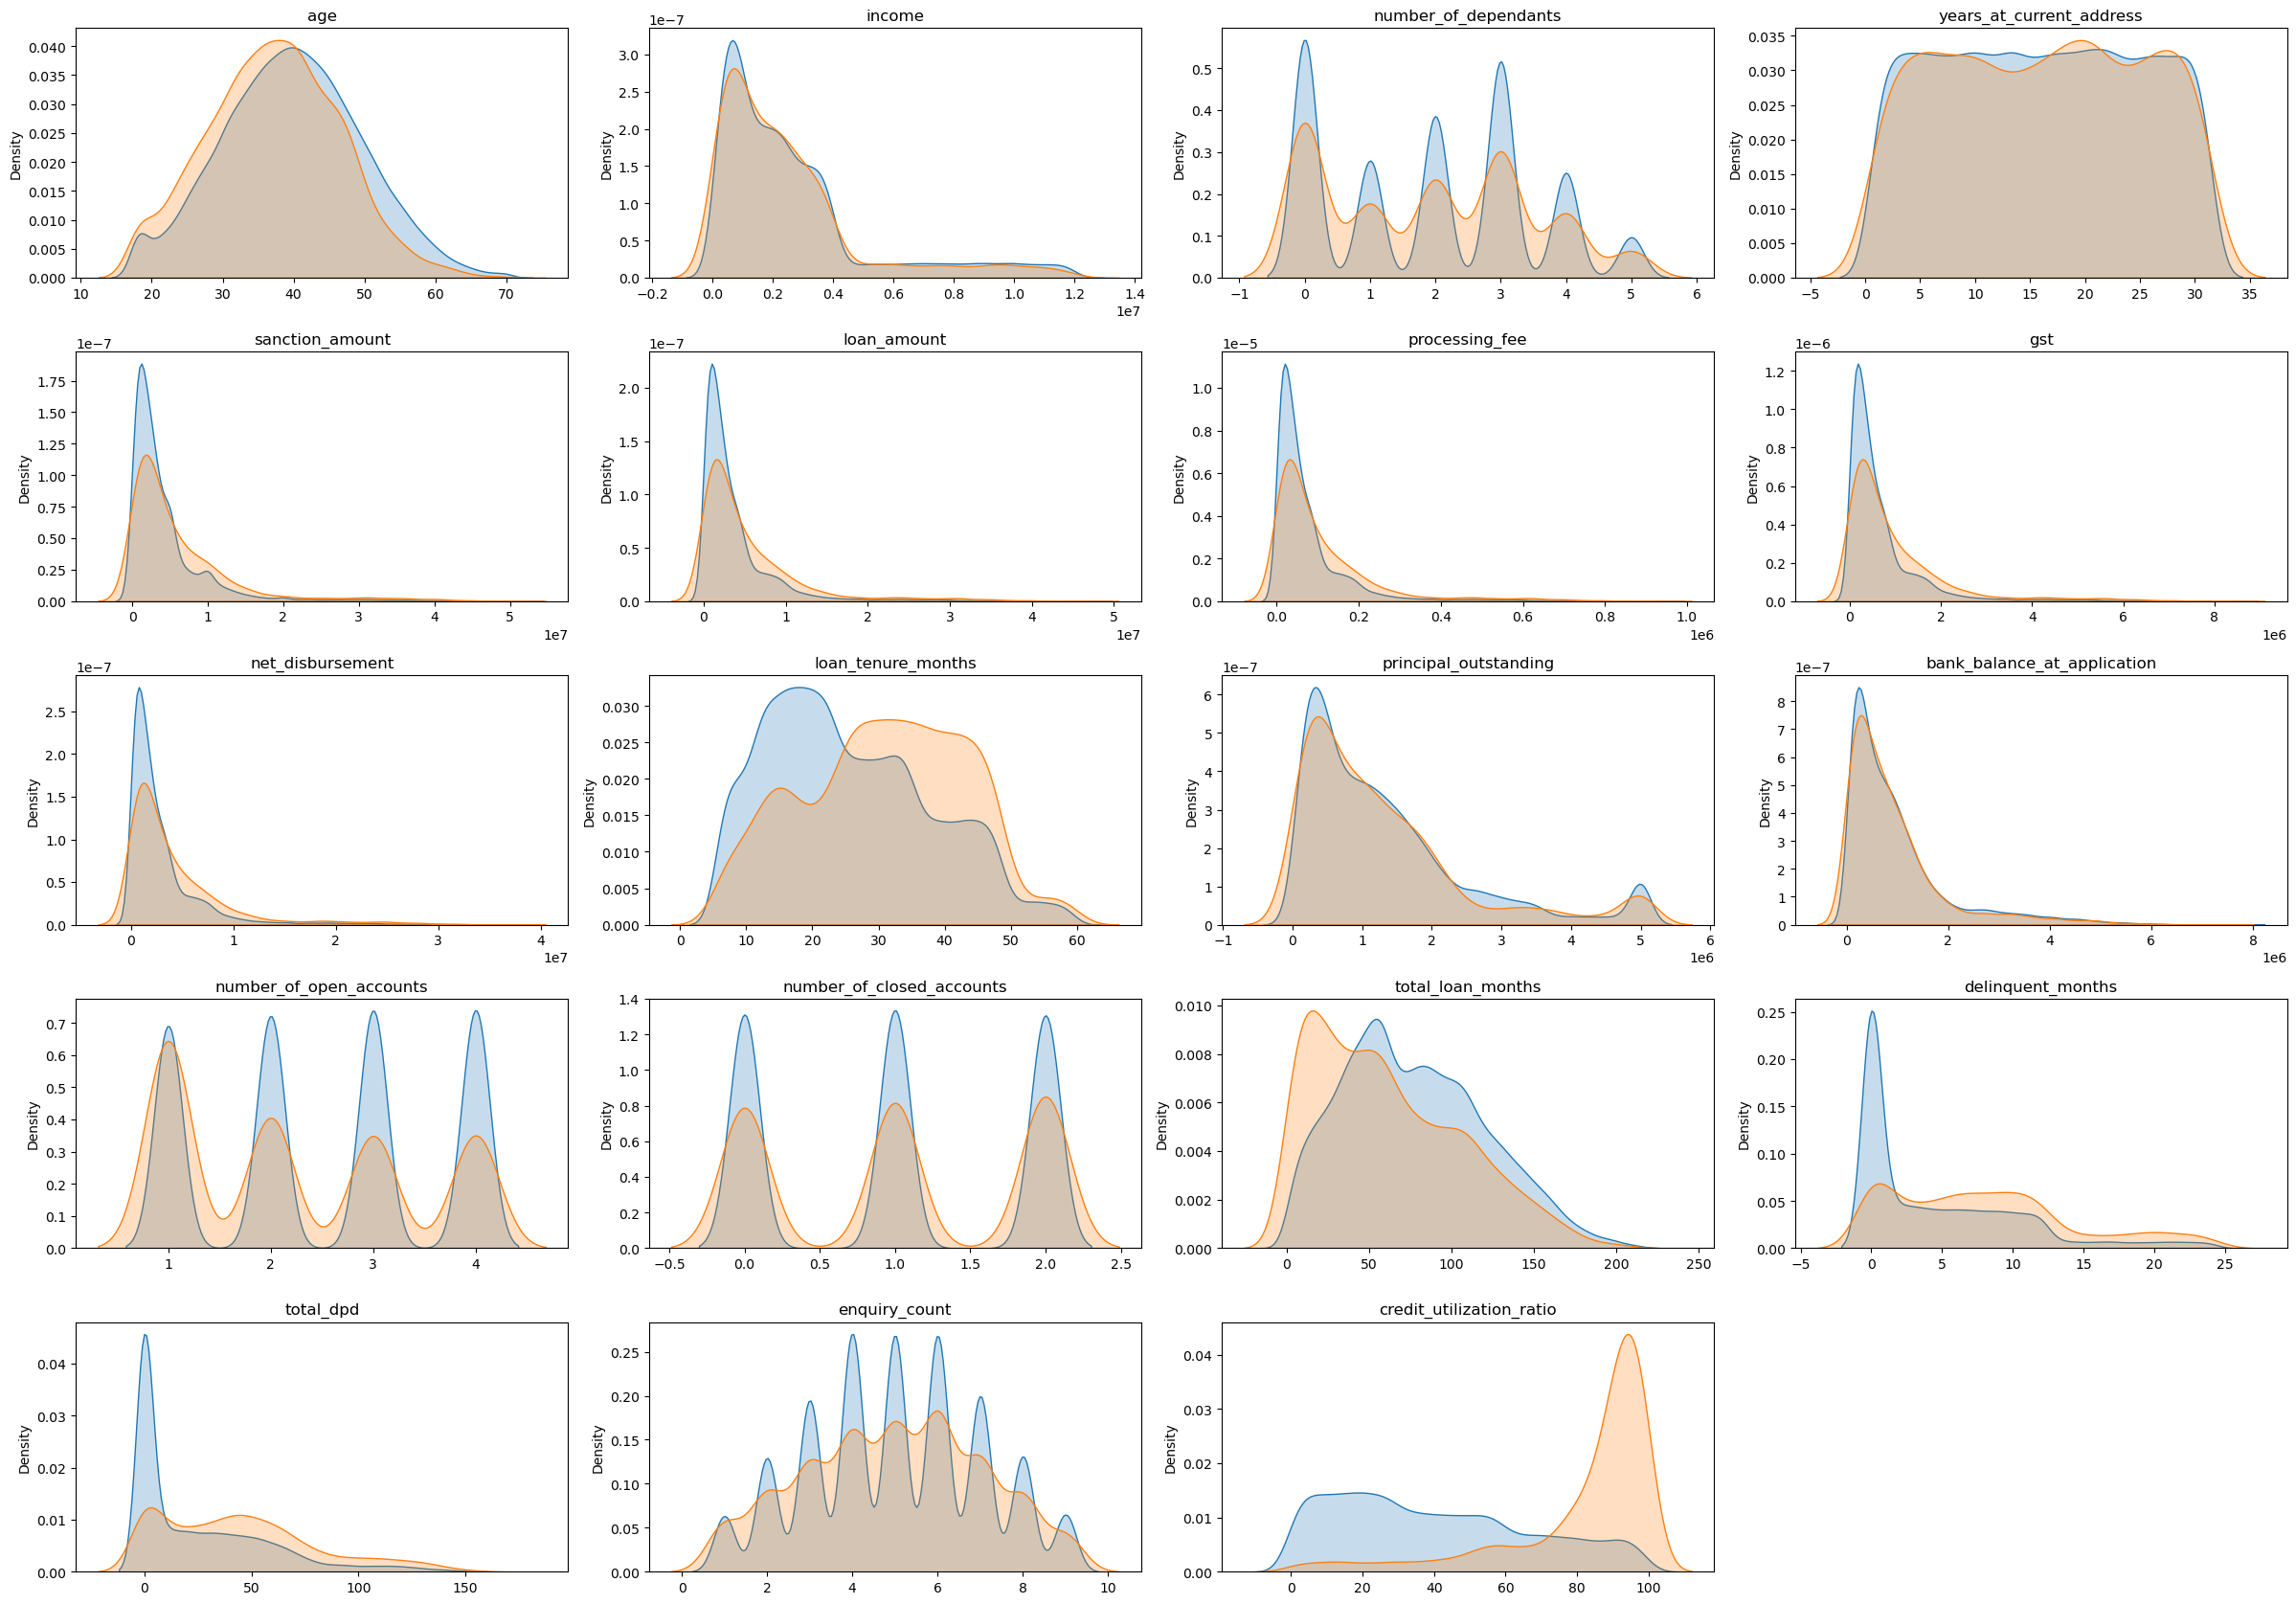

In [50]:
plt.figure(figsize = (24,20)) #width height in inches

for i,col in enumerate(columns_continuous):
    plt.subplot(6,4,i+1) #1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[df_train_1.default == 0][col], fill = True,label = 'Default = 0')
    sns.kdeplot(df_train_1[df_train_1.default == 1][col], fill = True,label = 'Default = 1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 align = "center" style = "color:blue"> Feature Engineering </h3>

In [53]:
df_train_1[["loan_amount","income"]]

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000
9040,1695000,1500000
13077,905000,1817000
...,...,...
28515,1420000,2470000
5558,2753000,2472000
45236,4479000,1329000
49228,1890000,1274000


In [54]:
df_train_1["loan_to_income"] = df_train_1["loan_amount"] / df_train_1["income"]
df_train_1["loan_to_income"].describe()

df_test["loan_to_income"] = df_test["loan_amount"] / df_test["income"]


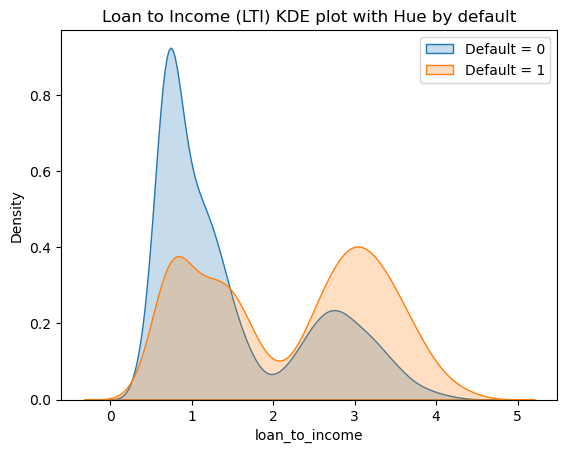

In [55]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['loan_to_income'], fill = True,label = 'Default = 0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['loan_to_income'], fill = True,label = 'Default = 1')
plt.title(f'Loan to Income (LTI) KDE plot with Hue by default')
plt.legend()
plt.show()

In [56]:
df_train_1[["delinquent_months","total_loan_months"]]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [57]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100/df_train_1['total_loan_months'])
df_train_1[["delinquent_months" , "total_loan_months" , "delinquency_ratio"]]
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100/df_test['total_loan_months'])


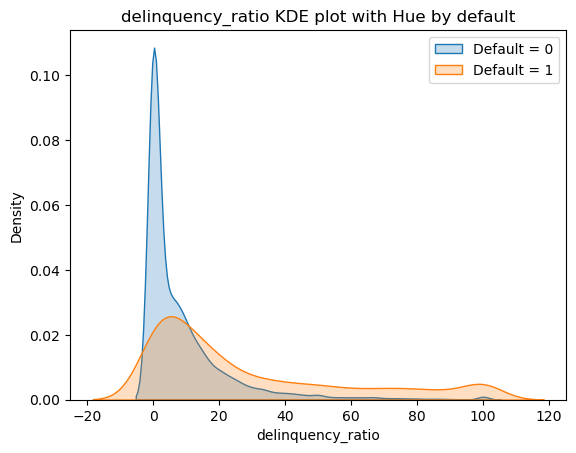

In [58]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['delinquency_ratio'], fill = True,label = 'Default = 0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['delinquency_ratio'], fill = True,label = 'Default = 1')
plt.title(f'delinquency_ratio KDE plot with Hue by default')
plt.legend()
plt.show()

In [59]:
df_train_1["avg_dpd_per_delinquency"] = (df_train_1['total_dpd']/ df_train_1['delinquent_months'])
df_train_1["avg_dpd_per_delinquency"].isna().sum()

15088

In [60]:
# division by zero error

In [61]:
df_train_1["avg_dpd_per_delinquency"] = np.where (

    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd']/ df_train_1['delinquent_months']),
    0
)

df_test["avg_dpd_per_delinquency"] = np.where (

    df_test['delinquent_months'] != 0,
    (df_test['total_dpd']/ df_test['delinquent_months']),
    0
)
df_train_1["avg_dpd_per_delinquency"].isna().sum()

0

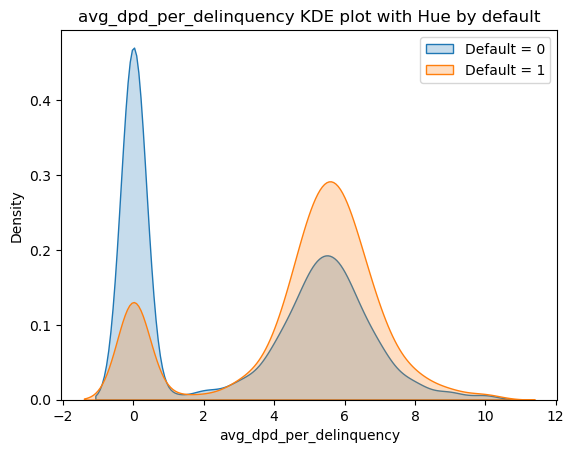

In [62]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['avg_dpd_per_delinquency'], fill = True,label = 'Default = 0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['avg_dpd_per_delinquency'], fill = True,label = 'Default = 1')
plt.title(f'avg_dpd_per_delinquency KDE plot with Hue by default')
plt.legend()
plt.show()

### Feature Selection

In [64]:
# removing unique identifiers which do not contribute to my target variable

In [65]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

In [66]:
# removing columns based on requirement

In [67]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [68]:
# Now to check multicolinearilty -> calculate variance inflation factor

In [69]:
#numeric cols without default col

In [70]:
df_train_3.select_dtypes(["int64","float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [71]:
# for VIF, we need to scale the columns first

In [72]:
X_train = df_train_3.drop('default', axis = 'columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = df_train_3.select_dtypes(['int64','float64']).columns

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head(3)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.42,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,0.83,...,0.49,0.33,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56


In [73]:
X_test = df_test.drop('default', axis = 'columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.01,1.00,1.00


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_Vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [75]:
calculate_Vif(X_train[cols_to_scale])

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [76]:
features_to_drop_vif = ['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis = 'columns')
numeric_cols = X_train_1.select_dtypes(['int64','float64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [77]:
vif_df = calculate_Vif(X_train[numeric_cols])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [78]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

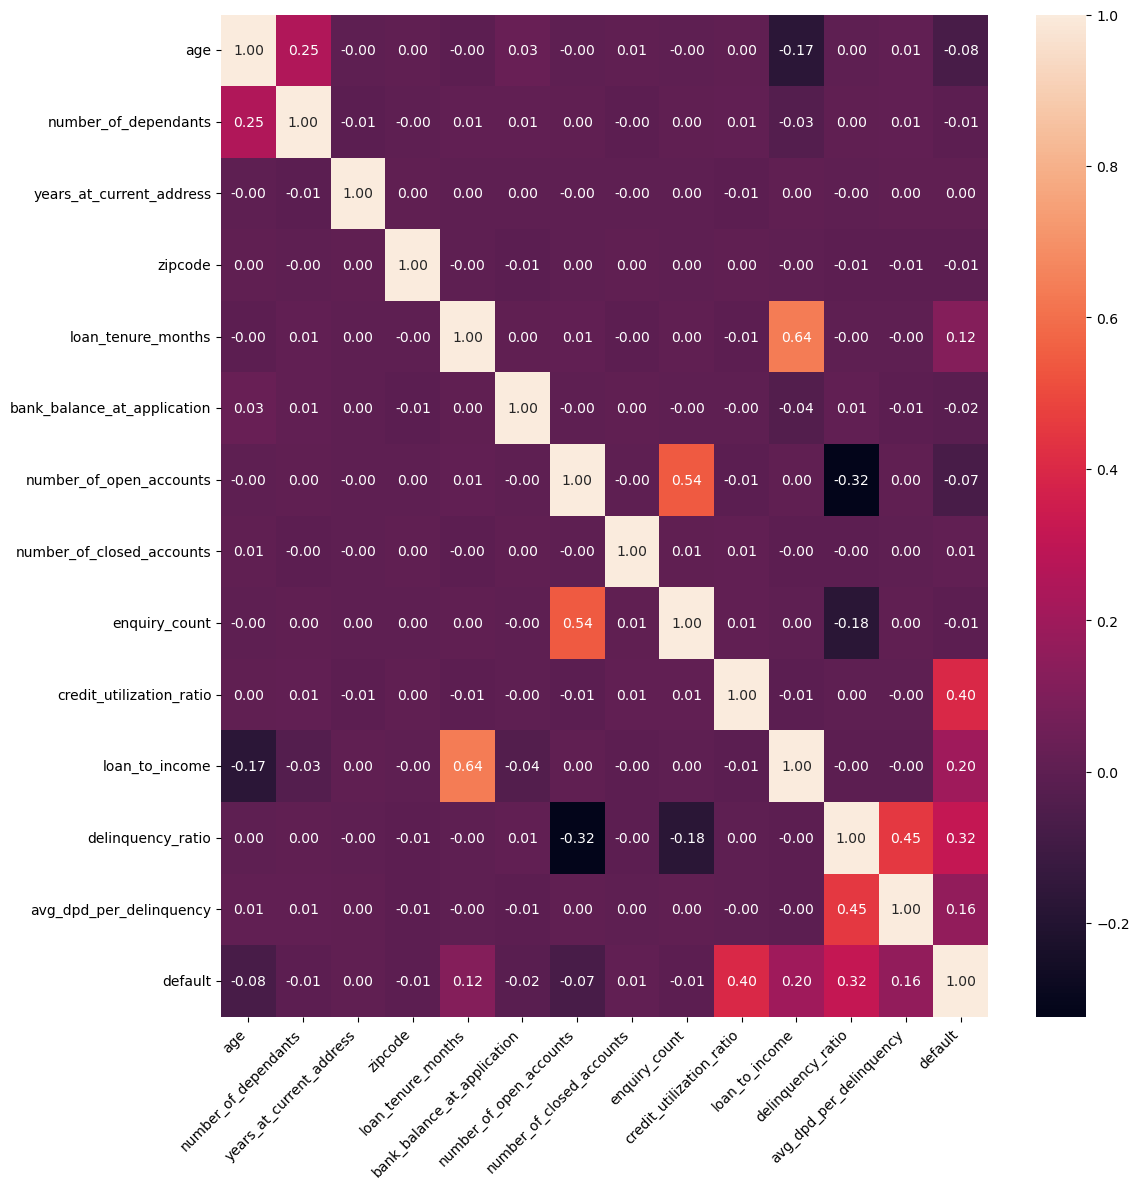

In [79]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_cols.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [80]:
# dealing with categorical columns 
# weight of evidence and information value

In [81]:
temp = pd.concat([X_train,y_train],axis = 1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [82]:
def calculate_woe_iv (df,feature,target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns = {'count': 'total', 'sum':'good'})
    grouped['bad']= grouped['total'] - grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] =  grouped['woe'] * (grouped['good_pct'] - grouped['bad_pct'])

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf],0)
    grouped['iv'] =  grouped['iv'].replace([np.inf, -np.inf],0)

    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped,total_iv = calculate_woe_iv(pd.concat([X_train,y_train],axis = 1), 'loan_purpose','default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [83]:
total_iv

0.3691197842282755

In [84]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [85]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis = 1),feature,'default')
        iv_values[feature] = iv
    else:
        X_binned = pd.cut(X_train_1[feature], bins = 10, labels = False)
        _, iv = calculate_woe_iv(pd.concat([X_binned,y_train],axis = 1),feature,'default')
    iv_values[feature] = iv
iv_values


{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.47572195076776647,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40176623566177694}

In [86]:
iv_df = pd.DataFrame(list(iv_values.items()), columns = ['Feature','IV'])
iv_df = iv_df.sort_values(by = 'IV', ascending = False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.35
19,delinquency_ratio,0.72
18,loan_to_income,0.48
20,avg_dpd_per_delinquency,0.40
10,loan_purpose,0.37
5,residence_type,0.25
12,loan_tenure_months,0.22
11,loan_type,0.16
0,age,0.09
14,number_of_open_accounts,0.08


In [87]:
selected_features_iv = [feature for feature,iv in iv_values.items() if iv>0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

>### Feature encoding

In [89]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [90]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,Owned,Home,Secured,0.42,1.00,0.36,0.42,0.13,0.59
32495,0.50,Owned,Education,Secured,0.83,0.67,0.05,0.31,0.06,0.62
43675,0.38,Mortgage,Home,Secured,0.49,0.00,0.00,0.76,0.22,0.56
9040,0.46,Mortgage,Education,Secured,0.64,0.67,0.88,0.19,0.00,0.00
13077,0.77,Owned,Personal,Unsecured,0.17,0.00,0.72,0.05,0.00,0.00


In [91]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first = True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first = True)

X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.79,0.42,1.00,0.36,0.42,0.13,0.59,True,False,False,True,False,False
32495,0.50,0.83,0.67,0.05,0.31,0.06,0.62,True,False,True,False,False,False
43675,0.38,0.49,0.00,0.00,0.76,0.22,0.56,False,False,False,True,False,False


<h3 align = "center" style = "color:blue"> Model Training </h3>

Attempt 1
1. Logistic Regression, Random Forest & XGB
2. No handeling of class imbalance

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Recall : if a person if likely to default, we want to catch it

Recall should be higher

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [98]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.83      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.97     12497



In [99]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': 545.5594781168514}
Best Score: 0.7571424666678884
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [100]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 10.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
Best Score: 0.7889647847735534
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.82      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



Attempt 2 

1. Logistic Regression and XGB
2. Handle class imbalance using under sampling

In [102]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [103]:
model = LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



previously model was biased towards non default class

precision is low its going to increase work for manual checking

In [106]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.52      0.99      0.68      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.95      0.82     12497
weighted avg       0.96      0.92      0.93     12497



Attempt 3
1. Logistic Regression
2. Handle class imbalance using SMOTE Tomek
3. Parameter tunning using OPTUNA

In [108]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state = 42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34197
1    34197
Name: count, dtype: int64

In [109]:
model = LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [110]:
#hyperparameter tuning

In [111]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [112]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [113]:
#Define the objective function for Optuna

def objective(trial):
    param = {
        'C' : trial.suggest_float('C', 1e-4, 1e4, log = True), #Logarithmically spaced values
        'solver': trial.suggest_categorical('solver',['lbfgs','liblinear','saga','newton-cg']), #Solvers
        'tol': trial.suggest_float('tol',1e-6,1e-1,log=True), #logarithmically spaced values for tolerance
        'class_weight' : trial.suggest_categorical('class_weight', [None,'balanced']) #class weights
    }


    model = LogisticRegression (**param, max_iter = 10000)

    #Calculate the cross-validated score f1_score
    f1_scorer = make_scorer(f1_score,average = 'macro')
    scores = cross_val_score (model, X_train_smt, y_train_smt, cv = 3, scoring = f1_scorer, n_jobs =-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction = 'maximize')
study_logistic.optimize(objective, n_trials = 50)


[I 2025-01-29 21:08:55,278] A new study created in memory with name: no-name-8bd3241f-4203-4e29-abcc-f82c5c470ede
[I 2025-01-29 21:08:55,367] Trial 0 finished with value: 0.9298591728857173 and parameters: {'C': 7309.004380359885, 'solver': 'lbfgs', 'tol': 0.004704519806085281, 'class_weight': None}. Best is trial 0 with value: 0.9298591728857173.
[I 2025-01-29 21:08:55,534] Trial 1 finished with value: 0.9328214067912093 and parameters: {'C': 0.015800635054049925, 'solver': 'saga', 'tol': 5.652440283799635e-05, 'class_weight': None}. Best is trial 1 with value: 0.9328214067912093.
[I 2025-01-29 21:08:55,661] Trial 2 finished with value: 0.9459148089872009 and parameters: {'C': 2.965206773008457, 'solver': 'newton-cg', 'tol': 0.00011338303421339736, 'class_weight': None}. Best is trial 2 with value: 0.9459148089872009.
[I 2025-01-29 21:08:55,739] Trial 3 finished with value: 0.7818771406860009 and parameters: {'C': 0.00016306175355497468, 'solver': 'lbfgs', 'tol': 0.03152015754615953, 

In [114]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9459292982375381
  Params: 
    C: 2.7015480027584817
    solver: saga
    tol: 3.0083035026936792e-05
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [116]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-01-29 21:09:03,835] A new study created in memory with name: no-name-4e4d2a4f-980e-4f26-9080-4dfd3afef8ff
[I 2025-01-29 21:09:04,260] Trial 0 finished with value: 0.8922946418511158 and parameters: {'lambda': 0.007576898052669121, 'alpha': 4.758641408985759, 'subsample': 0.896343661416737, 'colsample_bytree': 0.9751589771811093, 'max_depth': 3, 'eta': 0.04868460573133438, 'gamma': 3.9607844348624566, 'scale_pos_weight': 9.64272597440998, 'min_child_weight': 8, 'max_delta_step': 10}. Best is trial 0 with value: 0.8922946418511158.
[I 2025-01-29 21:09:04,738] Trial 1 finished with value: 0.9611759406397772 and parameters: {'lambda': 0.0012380131881346349, 'alpha': 0.03951551327382581, 'subsample': 0.5852067244918917, 'colsample_bytree': 0.9772608593790273, 'max_depth': 4, 'eta': 0.28612954194375134, 'gamma': 0.748651474158738, 'scale_pos_weight': 8.587473401991208, 'min_child_weight': 2, 'max_delta_step': 10}. Best is trial 1 with value: 0.9611759406397772.
[I 2025-01-29 21:09:05

In [117]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9757812509442337
  Params: 
    lambda: 0.1179023705851048
    alpha: 0.012791401841270164
    subsample: 0.9055414585443097
    colsample_bytree: 0.575313616535847
    max_depth: 10
    eta: 0.24580646476157994
    gamma: 1.0507341963827315
    scale_pos_weight: 2.0103593839083524
    min_child_weight: 3
    max_delta_step: 5
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.71      0.85      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



## Model Evaluation : ROC/AUC

In [119]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [120]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754]),
 array([0.        , 0.0009311 , 0.16201117, 0.16201117, 0.17783985]),
 array([       inf, 1.        , 0.99942081, 0.99939824, 0.99928272]))

In [121]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9836892668602385

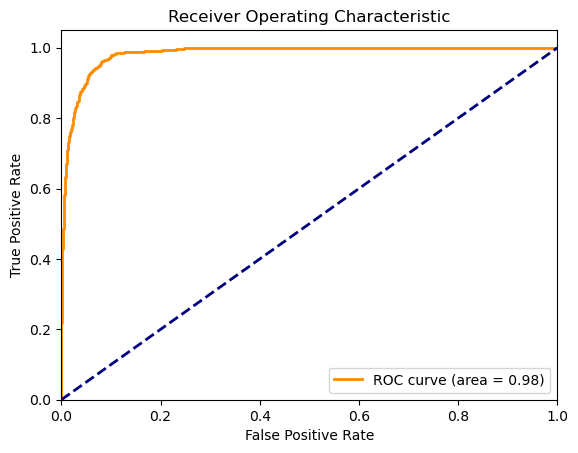

In [122]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Evaluation : RankOrdering, KS Statistic, Gini coefficient

In [229]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.54
15514,0,0.00
30367,0,0.01


In [231]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.54,8
15514,0,0.00,2
30367,0,0.01,6


In [233]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.00
mean       0.49
std        0.18
min        0.22
25%        0.32
50%        0.47
75%        0.64
max        0.82
Name: Default Probability, dtype: float64

In [235]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34784\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.00,0.00,0.00,1250.00
1,1,0.00,0.00,0.00,1250.00
2,2,0.00,0.00,0.00,1249.00
3,3,0.00,0.00,0.00,1250.00
4,4,0.00,0.00,0.00,1250.00
5,5,0.00,0.00,0.00,1249.00
6,6,0.00,0.03,5.00,1245.00
7,7,0.03,0.22,10.00,1239.00
8,8,0.22,0.82,161.00,1089.00
9,9,0.82,1.00,898.00,352.00


In [237]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.00,0.00,0.00,1250.00,0.00,100.00
1,1,0.00,0.00,0.00,1250.00,0.00,100.00
2,2,0.00,0.00,0.00,1249.00,0.00,100.00
3,3,0.00,0.00,0.00,1250.00,0.00,100.00
4,4,0.00,0.00,0.00,1250.00,0.00,100.00
5,5,0.00,0.00,0.00,1249.00,0.00,100.00
6,6,0.00,0.03,5.00,1245.00,0.40,99.60
7,7,0.03,0.22,10.00,1239.00,0.80,99.20
8,8,0.22,0.82,161.00,1089.00,12.88,87.12
9,9,0.82,1.00,898.00,352.00,71.84,28.16


In [239]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16
1,8,0.22,0.82,161.00,1089.00,12.88,87.12
2,7,0.03,0.22,10.00,1239.00,0.80,99.20
3,6,0.00,0.03,5.00,1245.00,0.40,99.60
4,5,0.00,0.00,0.00,1249.00,0.00,100.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00


In [241]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00
1,8,0.22,0.82,161.00,1089.00,12.88,87.12,1059.00,1441.00
2,7,0.03,0.22,10.00,1239.00,0.80,99.20,1069.00,2680.00
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00


In [243]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08
1,8,0.22,0.82,161.00,1089.00,12.88,87.12,1059.00,1441.00,98.60,12.61
2,7,0.03,0.22,10.00,1239.00,0.80,99.20,1069.00,2680.00,99.53,23.46
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00


In [245]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08,80.53
1,8,0.22,0.82,161.00,1089.00,12.88,87.12,1059.00,1441.00,98.60,12.61,85.99
2,7,0.03,0.22,10.00,1239.00,0.80,99.20,1069.00,2680.00,99.53,23.46,76.07
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36,65.64
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29,54.71
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24,43.76
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18,32.82
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11,21.89
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06,10.94
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00,0.00


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [249]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836892668602385
Gini Coefficient: 0.967378533720477


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

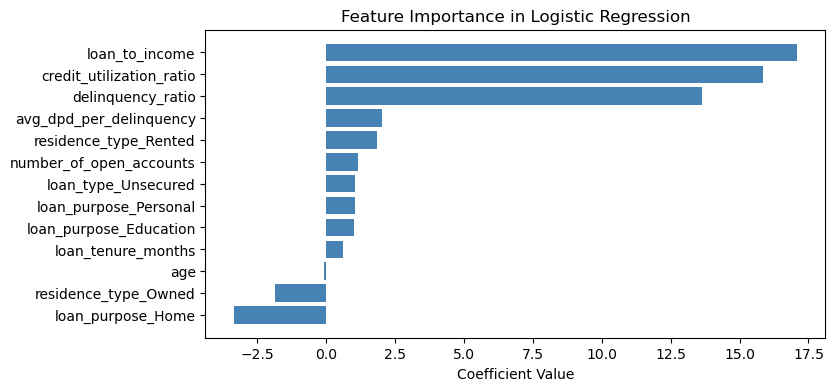

In [253]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()